In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = pd.read_csv('/home/urwa/Documents/side_projects/urban/data/featureData/com_jfk.csv')

In [4]:
def train(model, optimiser, scheduler, criterion,epochs = 500):
    losses = []
    # Main optimization loop
    for t in range(epochs):

        optimiser.zero_grad()

        y_predicted = model(X_train)

        current_loss = criterion(y_predicted, y_train)

        current_loss.backward()

        optimiser.step()

        print(f"t = {t}, loss = {current_loss}")

        losses.append(current_loss)

        scheduler.step()    
    return losses,model

In [5]:
dataset.shape

(8757, 113)

In [6]:
dataset.head(3)

,Date,Hour,0.0,0.1,0.2,1.0,1.1,1.2,1.3,2.0,...,4.1_lag_3,4.2_lag_3,4.3_lag_3,4.4_lag_3,4.5_lag_3,5.0_lag_3,5.1_lag_3,5.2_lag_3,5.3_lag_3,arrival_lag_3
0,2018-01-01,3,2,0,0,5,1,2,4,1,...,15.0,47.0,20.0,7.0,21.0,1.0,0.0,0.0,0.0,6.0
1,2018-01-01,4,11,3,4,7,0,4,1,2,...,11.0,41.0,2.0,2.0,5.0,2.0,0.0,0.0,0.0,6.0
2,2018-01-01,5,51,6,28,27,36,23,34,2,...,3.0,15.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0


In [7]:
class Linear_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Linear_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=out_features, bias=True)
        
    def forward(self, x):
        return self.fc1(x)

In [8]:
class Simple_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Simple_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=1000, bias=True)
        self.fc2 = nn.Linear(in_features=1000, out_features=500, bias=True)
        self.fc3 = nn.Linear(in_features=500, out_features=out_features, bias=True)
        
    def forward(self, x):
        y = F.relu(self.fc1(x))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

In [9]:
lag_columns = [c for c in dataset.columns if 'lag' in c]
len(lag_columns)

75

In [10]:
DateColumns = ['Date']

ext_columns = ['Dow', 'arrival','maxtemp', 'mintemp', 'avgtemp', 'departure', 'hdd',
       'cdd', 'participation', 'newsnow', 'snowdepth', 'ifSnow']

targetColumns = [c for c in dataset.columns if c not in ext_columns and \
                c not in DateColumns and c not in lag_columns and c != 'Hour']
len(targetColumns)

24

In [11]:
features_cols = [c for c in dataset.columns if c not in targetColumns and c not in DateColumns]
len(features_cols)

88

In [12]:
x = dataset[features_cols].values
y = dataset[targetColumns].values

In [13]:
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# scaler_x.fit(x)
# scaler_y.fit(y)

# x = scaler_x.transform(x)
# y = scaler_y.transform(y)

In [14]:
x = torch.tensor(x).float().to(device)
print(x.shape)
y = torch.tensor(y).float().to(device)
print(y.shape)

torch.Size([8757, 88])
torch.Size([8757, 24])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

t = 0, loss = 32.632076263427734
t = 1, loss = 361.24200439453125
t = 2, loss = 146.27928161621094
t = 3, loss = 361.4561462402344
t = 4, loss = 146.11961364746094
t = 5, loss = 361.6450500488281
t = 6, loss = 145.97999572753906
t = 7, loss = 361.7682189941406
t = 8, loss = 145.8929901123047
t = 9, loss = 361.8885803222656
t = 10, loss = 145.8054962158203
t = 11, loss = 361.9612121582031
t = 12, loss = 145.7490692138672
t = 13, loss = 362.0513916015625
t = 14, loss = 145.66201782226562
t = 15, loss = 362.1164855957031
t = 16, loss = 145.6094512939453
t = 17, loss = 362.2076416015625
t = 18, loss = 145.5324249267578
t = 19, loss = 362.2710266113281
t = 20, loss = 145.482177734375
t = 21, loss = 362.3204345703125
t = 22, loss = 145.44215393066406
t = 23, loss = 362.3868103027344
t = 24, loss = 145.38040161132812
t = 25, loss = 362.4272766113281
t = 26, loss = 145.34938049316406
t = 27, loss = 362.46759033203125
t = 28, loss = 145.3118438720703
t = 29, loss = 362.50372314453125
t = 30, lo

t = 481, loss = 7.70978307723999
t = 482, loss = 7.7097578048706055
t = 483, loss = 7.7097320556640625
t = 484, loss = 7.709706783294678
t = 485, loss = 7.709681987762451
t = 486, loss = 7.709657192230225
t = 487, loss = 7.709630966186523
t = 488, loss = 7.709606170654297
t = 489, loss = 7.709580898284912
t = 490, loss = 7.709555149078369
t = 491, loss = 7.709529876708984
t = 492, loss = 7.7095046043396
t = 493, loss = 7.709478855133057
t = 494, loss = 7.70945405960083
t = 495, loss = 7.709428787231445
t = 496, loss = 7.709403038024902
t = 497, loss = 7.709378719329834
t = 498, loss = 7.709352493286133
t = 499, loss = 7.709327697753906
Training R2:  0.6797266831894033
Test R2:  0.678432117401737


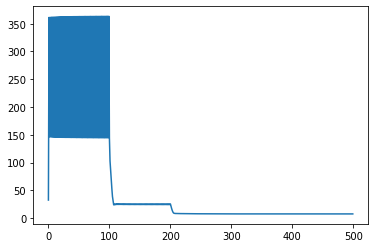

In [16]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Linear_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)


t = 0, loss = 24.843494415283203
t = 1, loss = 381.8148498535156
t = 2, loss = 24.66884994506836
t = 3, loss = 206.57867431640625
t = 4, loss = 66.3736343383789
t = 5, loss = 200.25140380859375
t = 6, loss = 660034.5625
t = 7, loss = 104.52891540527344
t = 8, loss = 672189.875
t = 9, loss = 82854674432.0
t = 10, loss = 15987012608.0
t = 11, loss = 77677551616.0
t = 12, loss = 5.068299865864274e+17
t = 13, loss = 3156991551733760.0
t = 14, loss = 504930861056.0
t = 15, loss = 80374.484375
t = 16, loss = 23.107608795166016
t = 17, loss = 24.5872802734375
t = 18, loss = 24.583728790283203
t = 19, loss = 24.58017921447754
t = 20, loss = 24.57662582397461
t = 21, loss = 24.57308006286621
t = 22, loss = 24.56960105895996
t = 23, loss = 24.566333770751953
t = 24, loss = 24.56305503845215
t = 25, loss = 24.559906005859375
t = 26, loss = 24.556928634643555
t = 27, loss = 24.5538272857666
t = 28, loss = 24.551000595092773
t = 29, loss = 24.547887802124023
t = 30, loss = 24.545085906982422
t = 31

t = 256, loss = 24.309131622314453
t = 257, loss = 24.309101104736328
t = 258, loss = 24.309070587158203
t = 259, loss = 24.309040069580078
t = 260, loss = 24.309009552001953
t = 261, loss = 24.308975219726562
t = 262, loss = 24.308948516845703
t = 263, loss = 24.308914184570312
t = 264, loss = 24.30888557434082
t = 265, loss = 24.308853149414062
t = 266, loss = 24.308822631835938
t = 267, loss = 24.308792114257812
t = 268, loss = 24.308761596679688
t = 269, loss = 24.308727264404297
t = 270, loss = 24.308700561523438
t = 271, loss = 24.308666229248047
t = 272, loss = 24.308635711669922
t = 273, loss = 24.308605194091797
t = 274, loss = 24.308576583862305
t = 275, loss = 24.308542251586914
t = 276, loss = 24.308513641357422
t = 277, loss = 24.308481216430664
t = 278, loss = 24.308452606201172
t = 279, loss = 24.30841827392578
t = 280, loss = 24.308387756347656
t = 281, loss = 24.30835723876953
t = 282, loss = 24.308326721191406
t = 283, loss = 24.30829429626465
t = 284, loss = 24.30826

t = 496, loss = 24.307424545288086
t = 497, loss = 24.307424545288086
t = 498, loss = 24.307422637939453
t = 499, loss = 24.307422637939453
Training R2:  -2.6549522600067688
Test R2:  -462.92573581986795


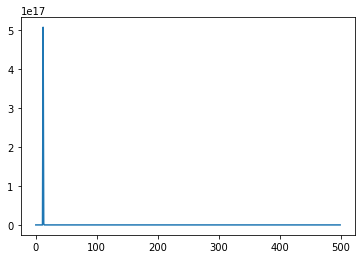

In [17]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Simple_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)
